# Predicting Melbourne House Prices
## Phase 2: Statistical Modelling

#### Group Name:

#### Name(s) & ID(s) of Group Members:

#### 

## Table of Contents
- [Introduction](#intro)
- [Statistical Modelling](#sm)
- [Critique & Limitations](#cl)
- [Summary & Conclusions](#sc)

## Introduction <a id='intro'></a>

### Phase 1 Summary

A brief yet complete and accurate summary of the work conducted for your Phase 1 report and how they relate to your Phase 2 report. 

**Important Phase 2 Note:** Please do NOT include your Phase 1 report or its contents with your Phase 2 submissions. You can, however, make some changes with your Phase 1 tasks if you need to, and then ONLY include these changes with your Phase 2 report with some explanation for these changes.

### Report Overview

A complete and accurate overview of the contents of your Phase 2 report. Clarification: A Table of Contents is not a report overview.

### Overview of Methodology

A detailed, complete, and accurate overview of your statistical modelling methodology (which is multiple linear regression). More specifically, in this subsection, you will provide a summary of your "Statistical Modelling" section below.

## Statistical Modelling <a id='sm'></a>

(Statistical Modelling Section: Details of assumptions check, model selection, plots of residuals, and technical analysis of regression results.)

**NOTE:** The second half of [this](https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb) regression case study ("Statistical Modeling and Performance Evaluation" Section) will be **very helpful** for this section.

### Full Model Overview

Overview of your full model, including the variables and terms you are using in your model.

#### Module Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv("https://raw.githubusercontent.com/BenRyc/SPACE-/main/orbitDistNoLim.csv")

### Data Procesing 
Here we proces the data like we did in the Phase one so that it is ready for the modeling 

In [3]:
rad = df.dropna(subset=['pl_rade', 'pl_radeerr1', 'pl_radeerr2'])
mass = df.dropna(subset=['pl_masse', 'pl_masseerr1', 'pl_masseerr2'])
dens = df.dropna(subset=['pl_dens', 'pl_denserr1', 'pl_denserr2'])
orbeccen = df.dropna(subset=['pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2'])
insol = df.dropna(subset=['pl_insol', 'pl_insolerr1', 'pl_insolerr2'])
eqt = df.dropna(subset=['pl_eqt', 'pl_eqterr1', 'pl_eqterr2'])
teff = df.dropna(subset=['st_teff', 'st_tefferr1', 'st_tefferr2'])
radst = df.dropna(subset=['st_rad', 'st_raderr1', 'st_raderr2'])
massst = df.dropna(subset=['st_mass', 'st_masserr1', 'st_masserr2'])
met = df.dropna(subset=['st_met', 'st_meterr1', 'st_meterr2'])
agest = df.dropna(subset=['st_age', 'st_ageerr1', 'st_ageerr2'])

# 3 verables 

massDens = df.dropna(subset=['pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_dens', 'pl_denserr1', 'pl_denserr2'])
insolEqt = df.dropna(subset=['pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2'])
massstMet = df.dropna(subset=['st_mass', 'st_masserr1', 'st_masserr2', 'st_met', 'st_meterr1', 'st_meterr2'])


rad = rad[['pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
mass = mass[['pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
dens = dens[['pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
orbeccen = orbeccen[['pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
insol = insol[['pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
eqt = eqt[['pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
teff = teff[['st_teff', 'st_tefferr1', 'st_tefferr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
radst = radst[['st_rad', 'st_raderr1', 'st_raderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
massst = massst[['st_mass', 'st_masserr1', 'st_masserr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
met = met[['st_met', 'st_meterr1', 'st_meterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
agest = agest[['st_age', 'st_ageerr1', 'st_ageerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]

# 3 verable 
massDens = massDens[['pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
insolEqt = insolEqt[['pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
massstMet = massstMet[['st_mass', 'st_masserr1', 'st_masserr2', 'st_met', 'st_meterr1', 'st_meterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]



rad = rad[~((rad < (rad.quantile(0.25) - 1.5 * (rad.quantile(0.75) - rad.quantile(0.25)))) |(rad > (rad.quantile(0.75) + 1.5 * (rad.quantile(0.75) - rad.quantile(0.25))))).any(axis=1)]
mass = mass[~((mass < (mass.quantile(0.25) - 1.5 * (mass.quantile(0.75) - mass.quantile(0.25)))) |(mass > (mass.quantile(0.75) + 1.5 * (mass.quantile(0.75) - mass.quantile(0.25))))).any(axis=1)]
dens = dens[~((dens < (dens.quantile(0.25) - 1.5 * (dens.quantile(0.75) - dens.quantile(0.25)))) |(dens > (dens.quantile(0.75) + 1.5 * (dens.quantile(0.75) - dens.quantile(0.25))))).any(axis=1)]
orbeccen = orbeccen[~((orbeccen < (orbeccen.quantile(0.25) - 1.5 * (orbeccen.quantile(0.75) - orbeccen.quantile(0.25)))) |(orbeccen > (orbeccen.quantile(0.75) + 1.5 * (orbeccen.quantile(0.75) - orbeccen.quantile(0.25))))).any(axis=1)]
insol = insol[~((insol < (insol.quantile(0.25) - 1.5 * (insol.quantile(0.75) - insol.quantile(0.25)))) |(insol > (insol.quantile(0.75) + 1.5 * (insol.quantile(0.75) - insol.quantile(0.25))))).any(axis=1)]
eqt = eqt[~((eqt < (eqt.quantile(0.25) - 1.5 * (eqt.quantile(0.75) - eqt.quantile(0.25)))) |(eqt > (eqt.quantile(0.75) + 1.5 * (eqt.quantile(0.75) - eqt.quantile(0.25))))).any(axis=1)]
teff = teff[~((teff < (teff.quantile(0.25) - 1.5 * (teff.quantile(0.75) - teff.quantile(0.25)))) |(teff > (teff.quantile(0.75) + 1.5 * (teff.quantile(0.75) - teff.quantile(0.25))))).any(axis=1)]
radst = radst[~((radst < (radst.quantile(0.25) - 1.5 * (radst.quantile(0.75) - radst.quantile(0.25)))) |(radst > (radst.quantile(0.75) + 1.5 * (radst.quantile(0.75) - radst.quantile(0.25))))).any(axis=1)]
massst = massst[~((massst < (massst.quantile(0.25) - 1.5 * (massst.quantile(0.75) - massst.quantile(0.25)))) |(massst > (massst.quantile(0.75) + 1.5 * (massst.quantile(0.75) - massst.quantile(0.25))))).any(axis=1)]
met = met[~((met < (met.quantile(0.25) - 1.5 * (met.quantile(0.75) - met.quantile(0.25)))) |(met > (met.quantile(0.75) + 1.5 * (met.quantile(0.75) - met.quantile(0.25))))).any(axis=1)]
agest = agest[~((agest < (agest.quantile(0.25) - 1.5 * (agest.quantile(0.75) - agest.quantile(0.25)))) |(agest > (agest.quantile(0.75) + 1.5 * (agest.quantile(0.75) - agest.quantile(0.25))))).any(axis=1)]

# 3 verables
massDens = massDens[~((massDens < (massDens.quantile(0.25) - 1.5 * (massDens.quantile(0.75) - massDens.quantile(0.25)))) |(massDens > (massDens.quantile(0.75) + 1.5 * (massDens.quantile(0.75) - massDens.quantile(0.25))))).any(axis=1)]
insolEqt = insolEqt[~((insolEqt < (insolEqt.quantile(0.25) - 1.5 * (insolEqt.quantile(0.75) - insolEqt.quantile(0.25)))) |(insolEqt > (insolEqt.quantile(0.75) + 1.5 * (insolEqt.quantile(0.75) - insolEqt.quantile(0.25))))).any(axis=1)]
massstMet = massstMet[~((massstMet < (massstMet.quantile(0.25) - 1.5 * (massstMet.quantile(0.75) - massstMet.quantile(0.25)))) |(massstMet > (massstMet.quantile(0.75) + 1.5 * (massstMet.quantile(0.75) - massstMet.quantile(0.25))))).any(axis=1)]


### Full Model Diagnostic Checks

You need to check whether there are indications of violations of the regression assumptions for the full model.

### Feature Selection

You can use the code below to to perform backward feature selection using p-values ([credit](https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb)).

In [22]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")

NameError: name 'formula_string_encoded' is not defined

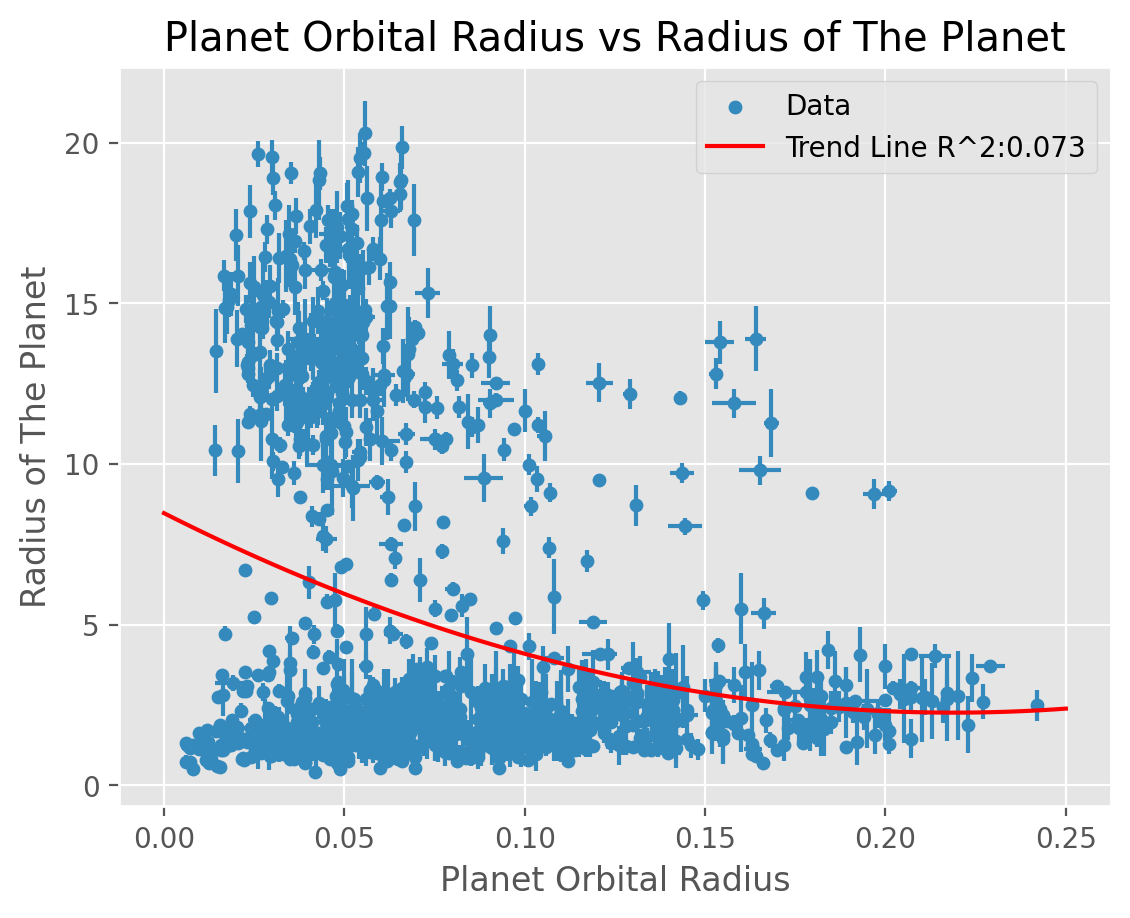

In [21]:
from scipy.optimize import curve_fit

def func(a, b, c, d):
    return d * (a **2) + a * b + c

popt, pcov = curve_fit(func, rad['pl_orbsmax'], rad['pl_rade'])
linex = np.linspace(0,0.25,100)
liney = func(linex, *popt)

slope, intercept, r_value, p_value, std_err = linregress(rad['pl_orbsmax'], rad['pl_rade'])
rad.plot(kind = 'scatter', 
         x = 'pl_orbsmax', 
         y = 'pl_rade', 

         xerr=rad['pl_orbsmaxerr1'], 
         yerr=rad['pl_radeerr1'],
         ylabel= 'Radius of The Planet',
         xlabel= 'Planet Orbital Radius',
         title='Planet Orbital Radius vs Radius of The Planet')

plt.plot(linex, liney, 'r')
# plt.plot(rad['pl_orbsmax'], intercept + slope*rad['pl_orbsmax'], 'r', label='fitted line')
plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
plt.show()

### Reduced Model Overview

Overview of your reduced model, including the variables and terms you are using in your model.

### Reduced Model Diagnostic Checks

You need to check whether there are indications of violations of the regression assumptions for the reduced model.

## Critique & Limitations <a id='cl'></a>

Critique & Limitations of your approach: strengths and weaknesses in detail.

## Summary & Conclusions <a id='sc'></a>

### Project Summary

A comprehensive summary of your entire project (both Phase 1 and Phase 2). That is, what exactly did you do in your project? (Example: I first cleaned the data in such and such ways. And then I applied multiple linear regression techniques in such and such ways. etc).

### Summary of Findings

A comprehensive summary of your findings. That is, what exactly did you find about your particular problem?

### Conclusions

Your detailed conclusions as they relate to your goals and objectives.